# Milestone 2
## Introduction
- Name: Izzan Dienurrahman
- Batch: HCK-003

## Objective
- Creating model inference from CNN model for brain tumor classification

## Problem Statements
- Load data inference & preprocessing pipeline (if any)
- Load saved model
- Predict new data images

# Import Library

In [3]:
# import library yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
import numpy  as np
import matplotlib.pyplot as plt
import PIL
import joblib

# Load Model

In [4]:
# load best CNN model
model = keras.models.load_model('models/brain_tumor_model_2.h5')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-02-11 14:17:53.669648: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-11 14:17:53.670190: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# load target class
with open('models/class_names.pkl','rb') as file_1:
    class_name = joblib.load(file_1)

# Data Loading

In [6]:
# load image
image = PIL.Image.open('mt.jpg')

In [7]:
# show image shape
np.asarray(image).shape

(500, 455, 3)

# Preprocess Data
Resize the image

In [8]:
# define preprocessor
def preprocess(img):
    IMG_SIZE = 256
    resize_layer = keras.layers.Resizing(
        height=IMG_SIZE,
        width=IMG_SIZE,
    )
    img_arr = np.asarray(img)
    img_arr = resize_layer(img_arr)
    img_arr_expanded = np.expand_dims(img_arr,axis=0)
    return img_arr_expanded

In [9]:
# do preprocessing
preprocessed_img = preprocess(image)

In [10]:
preprocessed_img.shape

(1, 256, 256, 3)

# Model Inference

1/1 [==============================] - 0s 181ms/step


2023-02-11 14:17:54.221861: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-11 14:17:54.292533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Prediction: meningioma_tumor


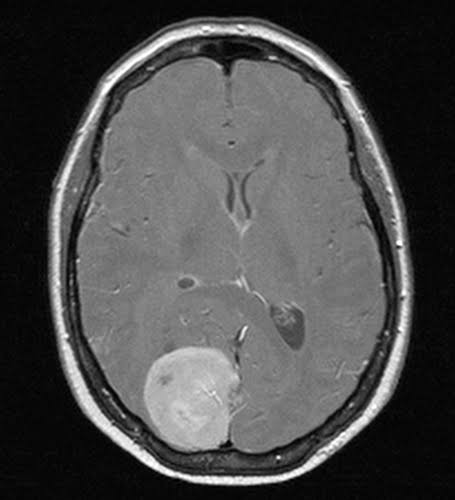

In [11]:
# do inference
classes = model.predict(preprocessed_img)
idx_class = np.argmax(classes)

print(f"Prediction: {class_name[idx_class]}")
image